In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import time
import scipy
import pyfftw
from NN_utils import Lin_ONN,gaussian_beam,to_boolean_tensor,generate_blaze_grating_phase,padd_images

In [2]:
#MNIST dataset
MNIST_train = datasets.MNIST(root='./data', train=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Lambda(to_boolean_tensor)]), download=True)
MNIST_test = datasets.MNIST(root='./data', train=False, transform=transforms.Compose([transforms.ToTensor(),transforms.Lambda(to_boolean_tensor)]), download=True)

#Dataloaders
train_loader_MNIST = torch.utils.data.DataLoader(dataset=MNIST_train, batch_size=10000, shuffle=True)
test_loader_MNIST = torch.utils.data.DataLoader(dataset=MNIST_test, batch_size=10000, shuffle=False)


In [3]:
X_train_MNIST, Y_train_MNIST = next(iter(train_loader_MNIST))

Gaussian_beam = gaussian_beam(X_train_MNIST.shape[-1])

X_train_MNIST = X_train_MNIST*Gaussian_beam

X_train_MNIST = padd_images(X_train_MNIST,pad_length=5)


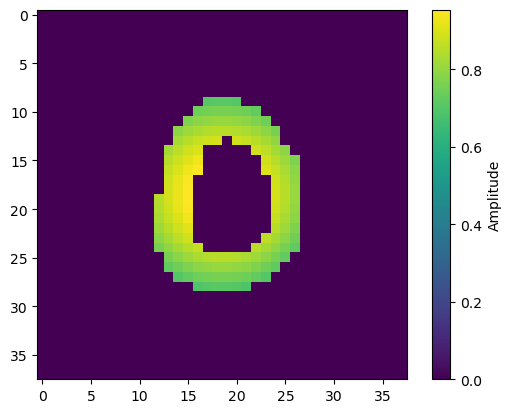

In [4]:
plt.imshow(np.squeeze(X_train_MNIST[0,0,:,:].detach().cpu().numpy()))
plt.colorbar(label='Amplitude')

In [ ]:
ONN = Lin_ONN(SLM_size=100)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move input data to the device
X_train_MNIST = X_train_MNIST.to(device)

# Move model to the device
ONN.to(device)

# Measure forward pass time
torch.cuda.synchronize()
start_time = time.time()

# Forward pass
Y = ONN.forward(X_train_MNIST)

torch.cuda.synchronize()
end_time = time.time()

print(f'Forward pass time: {end_time - start_time} seconds')

Forward pass time: 7.204941987991333 seconds


In [11]:
Y_cpu = np.squeeze(Y.detach().cpu().numpy())
X_cpu = np.squeeze(X_train_MNIST.detach().cpu().numpy())

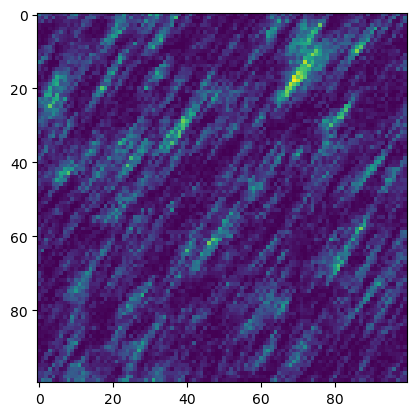

In [12]:
plt.imshow(np.squeeze(Y_cpu[0,:,:]))

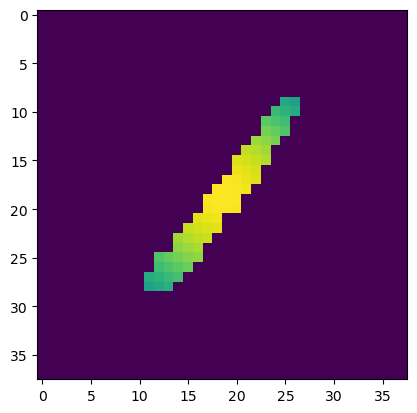

In [13]:
plt.imshow(np.squeeze(X_cpu[0,:,:]))